## Convolutional Neural Nets  
`reference`  
`https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html`  
## Torchvision  
### Load and normalize CIFAR10

In [0]:
import torch
import torchvision
import torchvision.transforms as transforms

from torch.autograd import Variable

from torch.utils.data.sampler import SubsetRandomSampler

import matplotlib.pyplot as plt
import numpy as np

In [4]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((.5, .5, .5),
                         (.5, .5, .5))
])

trainset = torchvision.datasets.CIFAR10(
    root='./data/cifar',
    train=True,
    download=True,
    transform=transform
)

testset = torchvision.datasets.CIFAR10(
    root='./data/cifar', 
    train=False,
    download=True,
    transform=transform
)

batch_size = 128

m = len(trainset)

indices = list(range(m))

np.random.shuffle(indices)

validm = int(m * .2)
validm

trainindex, validindex = indices[validm:], indices[:validm]

trainsampler = SubsetRandomSampler(trainindex)

validsampler = SubsetRandomSampler(validindex)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, sampler=trainsampler)

validloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, sampler=validsampler)

testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

classes = ('plane', 'car', 'bird', 'cat','deer',
           'dog','frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


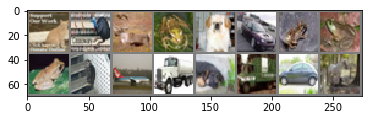

  cat  bird  deer  frog   dog   car  frog  frog  frog   cat plane truck   dog truck   car horse


In [5]:
def imshow(image):
    image = image / 2 + .5
    np_image = image.numpy()
    plt.imshow(np.transpose(np_image, (1, 2, 0)))
    plt.show()

# batch, labels
data, target = iter(trainloader).next()
imshow(torchvision.utils.make_grid(data[0:16]))

print(' '.join('%5s' % classes[target[i]] for i in range(16)))

### Define a Convolutional Neural Network

In [6]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, 5)
        self.conv2 = nn.Conv2d(64, 64, 5)
        
        self.pool = nn.MaxPool2d(2, 2)
        
        self.fc1 = nn.Linear(64 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        
        # flattening
        x = x.view(-1, 64 * 5 * 5)
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        
        return x

model = Net().cuda()

print(model)

Net(
  (conv1): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(64, 64, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1600, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


### Define a Loss function and optimizer

In [0]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()

optimizer = optim.SGD(model.parameters(), lr=.01)

### Train the network

In [0]:
epochs = 100

validloss_min = np.Inf

for epoch in range(epochs):
    
    trainloss = 0.0
    validloss = 0.0
    
    model.train()
    
    for data, target in trainloader:
        
        data, target = Variable(data.cuda()), Variable(target.cuda())
        
        optimizer.zero_grad()
        
        #forward
        output = model(data)
        
        #backward
        loss = criterion(output, target)
        loss.backward()
        
        #optimize
        optimizer.step()
        
        trainloss += loss.item() * data.size(0)
    
    model.eval()
    
    for data, target in validloader:
        data, target = Variable(data.cuda()), target.cuda()
      
        output = model(data)
        
        loss = criterion(output, target)
        
        validloss += loss.item() * data.size(0)
    
    trainloss = trainloss / len(trainloader.dataset)
    validloss = validloss / len(validloader.dataset)
    
    print('%d training loss: %.3f \tvalidation loss: %.3f' % (epoch+1, trainloss, validloss))
    
    if validloss <= validloss_min:
        torch.save(model.state_dict(), './model_cifar.pt')
        validloss_min = validloss

1 training loss: 1.837 	validation loss: 0.456
2 training loss: 1.785 	validation loss: 0.429
3 training loss: 1.634 	validation loss: 0.389
4 training loss: 1.513 	validation loss: 0.365
5 training loss: 1.411 	validation loss: 0.348
6 training loss: 1.329 	validation loss: 0.323
7 training loss: 1.264 	validation loss: 0.322
8 training loss: 1.218 	validation loss: 0.306
9 training loss: 1.176 	validation loss: 0.294
10 training loss: 1.142 	validation loss: 0.287
11 training loss: 1.114 	validation loss: 0.296
12 training loss: 1.086 	validation loss: 0.275
13 training loss: 1.060 	validation loss: 0.267
14 training loss: 1.033 	validation loss: 0.265
15 training loss: 1.009 	validation loss: 0.269
16 training loss: 0.983 	validation loss: 0.253
17 training loss: 0.959 	validation loss: 0.254
18 training loss: 0.939 	validation loss: 0.244
19 training loss: 0.916 	validation loss: 0.240
20 training loss: 0.892 	validation loss: 0.235
21 training loss: 0.870 	validation loss: 0.250
2

### Load the model

In [9]:
model.load_state_dict(torch.load('./model_cifar.pt'))

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

### Test the network on the test data

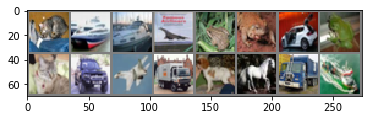

GroundTruth:    cat  ship  ship plane  frog  frog   car  frog   cat   car plane truck   dog horse truck  ship


In [10]:
data, target = iter(testloader).next()

imshow(torchvision.utils.make_grid(data[0:16]))
print('GroundTruth: ', ' '.join('%5s' % classes[target[i]] for i in range(16)))

In [11]:
output = model(Variable(data.cuda()))

_, predict = torch.max(output, 1)

print('Predict: ', ' '.join('%5s' % classes[predict[i]] for i in range(16)))

Predict:    cat  ship  ship plane  frog  frog   car  frog   cat   car plane truck   dog horse truck  frog


In [12]:
correct = 0
total = 0

with torch.no_grad():
    for data, target in testloader:
        data, target = Variable(data.cuda()), Variable(target.cuda())
        
        output = model(data)
        
        _, predict = torch.max(output, 1)
        
        total += target.size(0)
        correct += (predict == target).sum().item()

print('Accuracy of the network on the 10,000 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10,000 test images: 70 %


In [13]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

with torch.no_grad():
    for data, target in testloader:        
        data, target = Variable(data.cuda()), Variable(target.cuda())
        
        output = model(data)
        _, predict = torch.max(output, 1)
        c = (predict == target).squeeze()
        
        for i in range(4):
            label = target[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 72 %
Accuracy of   car : 85 %
Accuracy of  bird : 72 %
Accuracy of   cat : 47 %
Accuracy of  deer : 37 %
Accuracy of   dog : 42 %
Accuracy of  frog : 77 %
Accuracy of horse : 80 %
Accuracy of  ship : 90 %
Accuracy of truck : 64 %
